<a href="https://colab.research.google.com/github/Manika7777/CSI_WEEK4_MS/blob/main/Netflix_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io

# Styling (safe way)
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.1)


# *Loading the Dataset*

In [ ]:
# Upload CSV file
uploaded = files.upload()

# Automatically get the uploaded filename
filename = next(iter(uploaded))

# Read the file into a DataFrame
df = pd.read_csv(io.BytesIO(uploaded[filename]))
df.head()


Saving netflix_titles.csv to netflix_titles.csv


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
print("Dataset Shape:", df.shape)
df.info()

# Check missing values
df.isnull().sum()


Dataset Shape: (8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


# *Missing Values Heatmap*

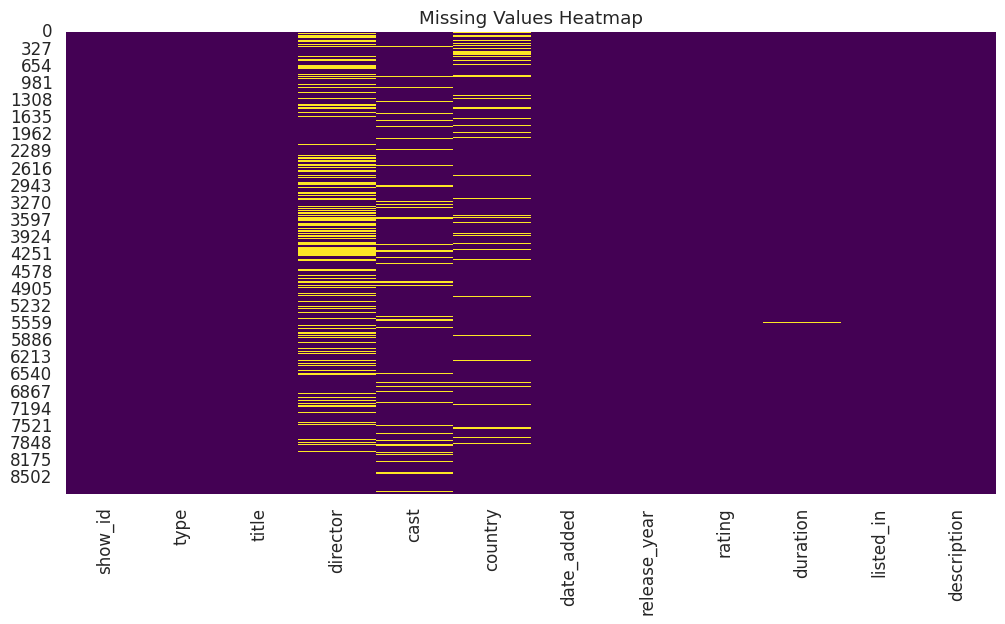

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
year_added       0.113546
main_genre       0.000000
dtype: float64


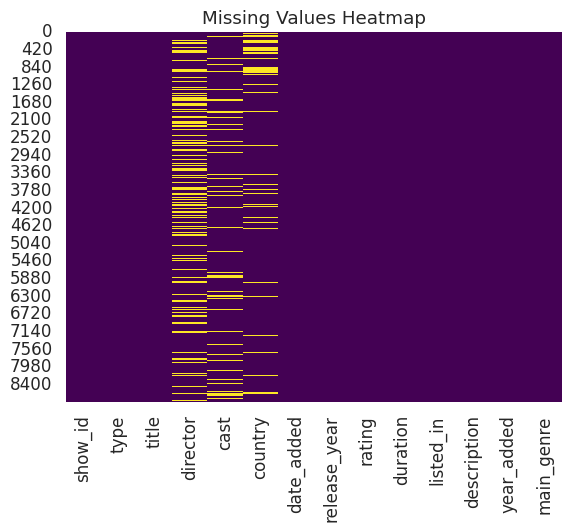

In [ ]:
# Check missing values
missing = df.isnull().sum() / len(df) * 100
print(missing)

# Visualize missing data
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

# *Distribution of Netflix Content Type (Pie Chart)*

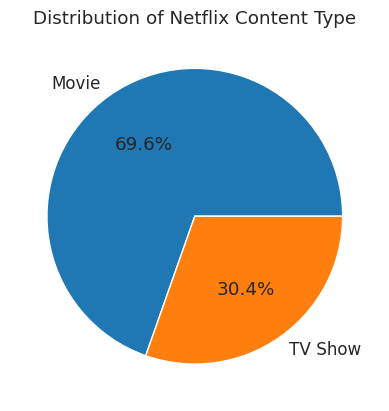

In [ ]:
type_counts = df["type"].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct="%1.1f%%")
plt.title("Distribution of Netflix Content Type")
plt.show()

# *Distribution of Netflix Content Type (Bar Chart)*

/tmp/ipython-input-6-2942071932.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


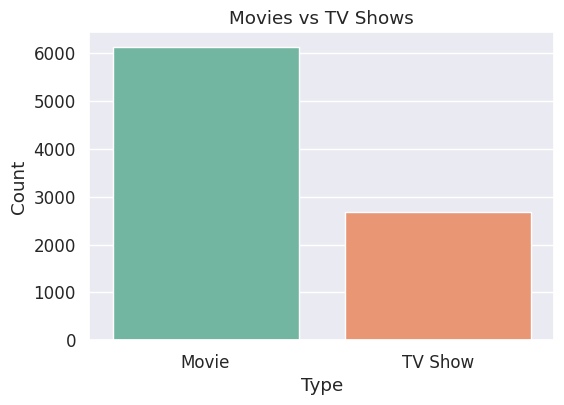

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette='Set2')
plt.title("Movies vs TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


# *Number of Titles Added Per Year*

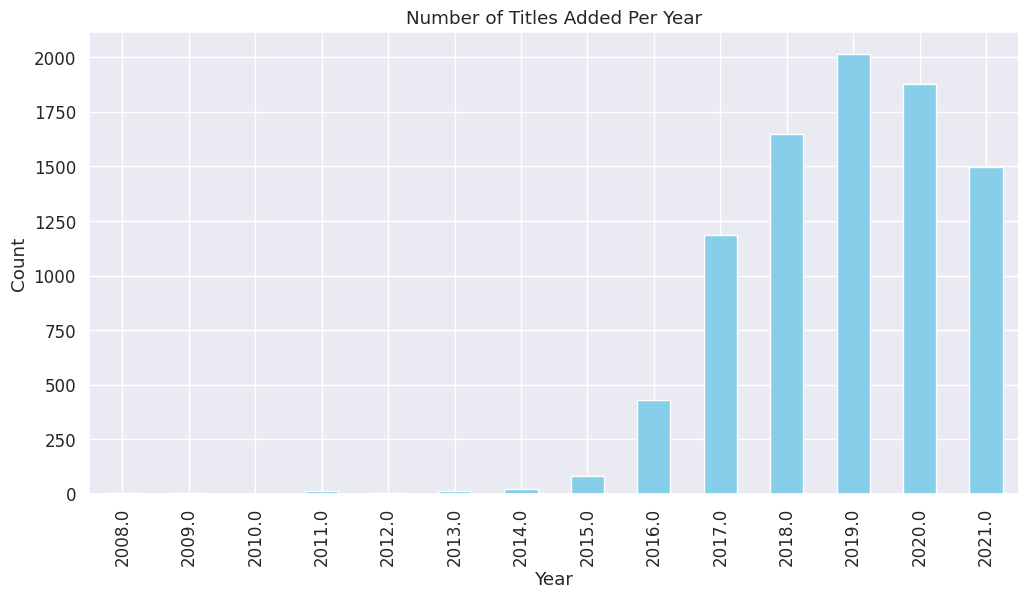

In [ ]:
# Convert to datetime safely
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')

# Extract year from parsed datetime
df['year_added'] = df['date_added'].dt.year

# Plot: Year-wise additions
plt.figure(figsize=(12,6))
df['year_added'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Number of Titles Added Per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


# *Top 10 Countries Producing Netflix Content*

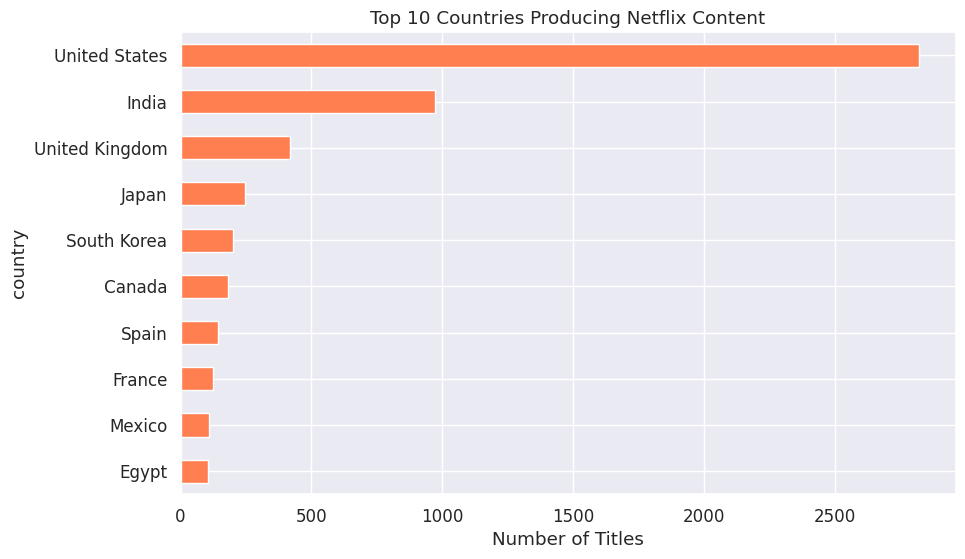

In [ ]:
plt.figure(figsize=(10,6))
df['country'].value_counts().head(10).plot(kind='barh', color='coral')
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Number of Titles")
plt.gca().invert_yaxis()
plt.show()


# *Content Ratings by Type*

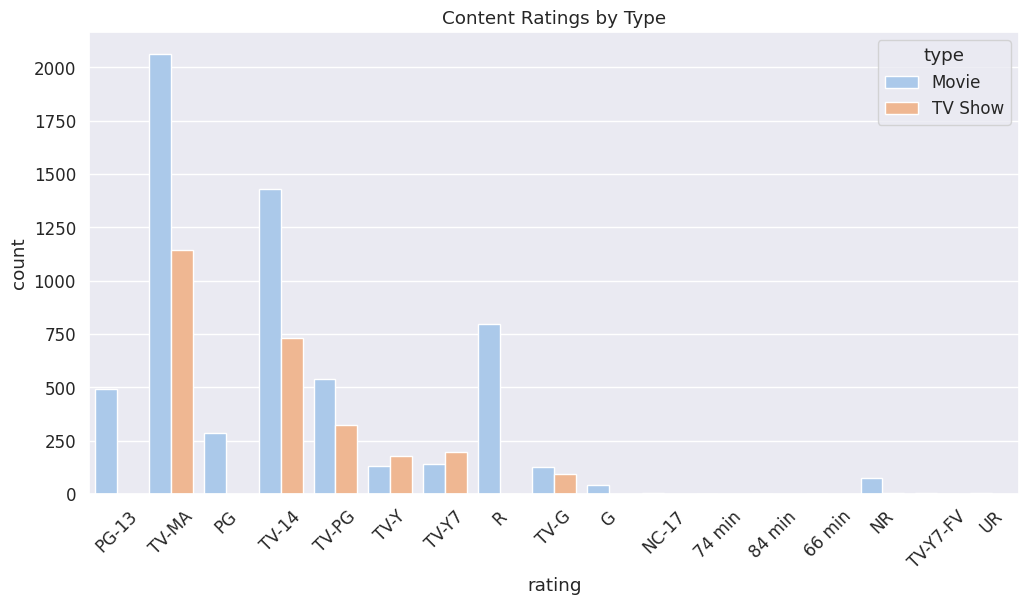

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='rating', hue='type', palette='pastel')
plt.xticks(rotation=45)
plt.title("Content Ratings by Type")
plt.show()


# *Top 10 Main Genres on Netflix*

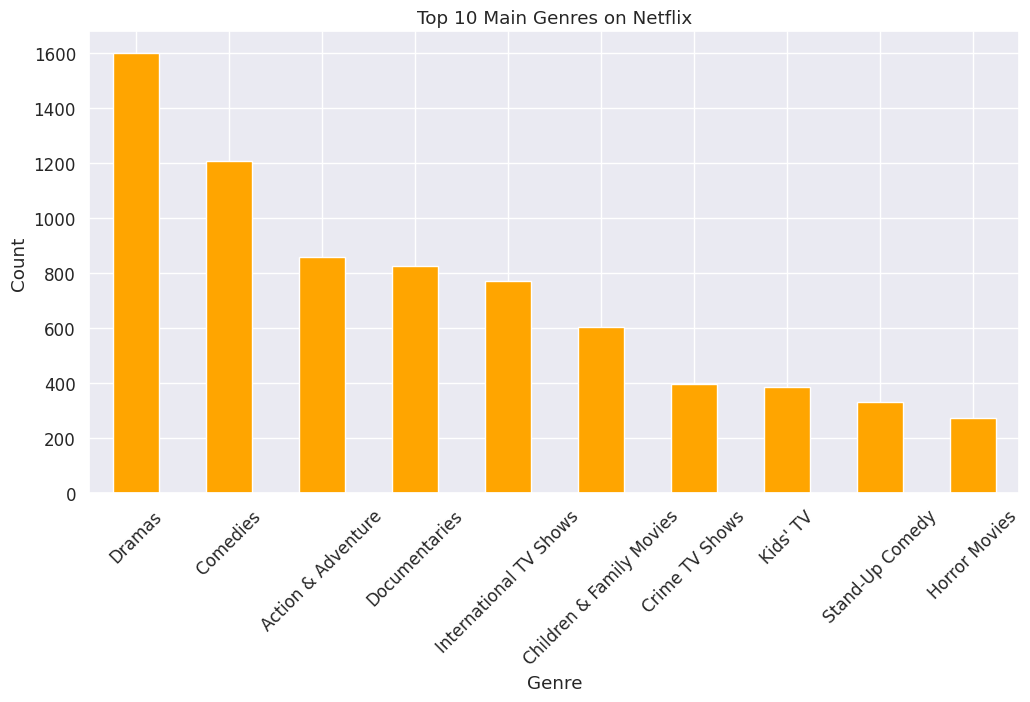

In [ ]:
df['main_genre'] = df['listed_in'].str.split(',').str[0]

plt.figure(figsize=(12,6))
df['main_genre'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Main Genres on Netflix")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


# *Content Type vs. Top Genres Heatmap*

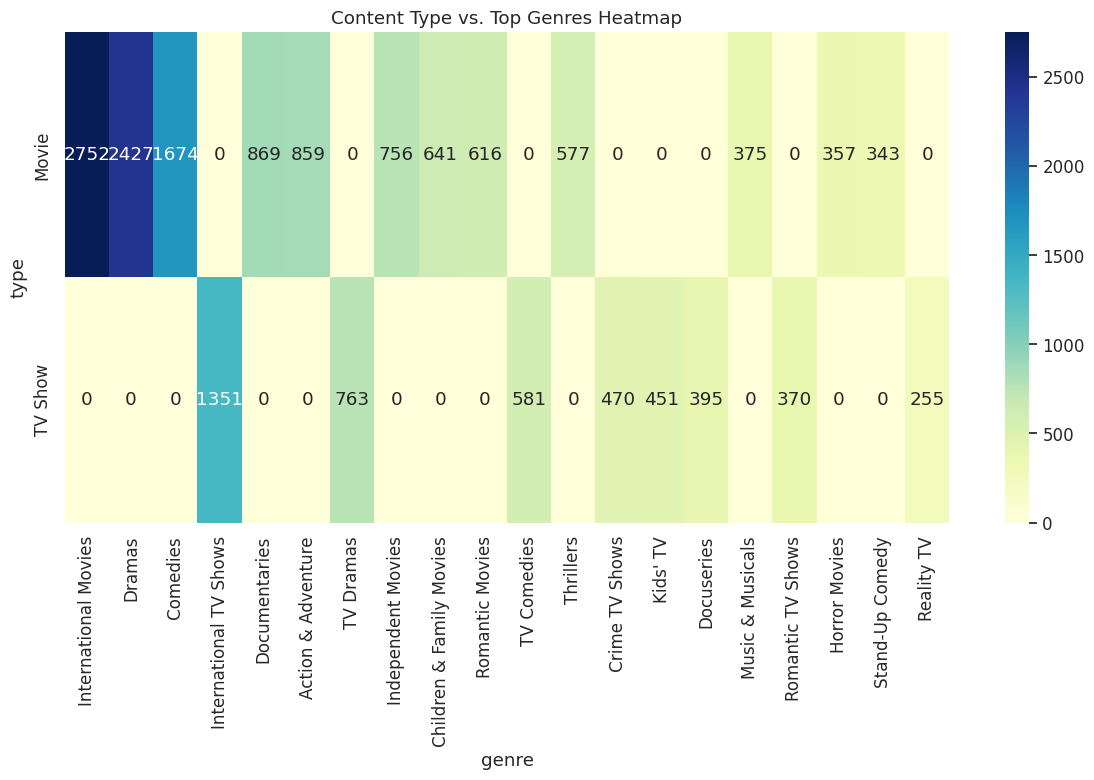

In [ ]:
# Split genres and explode into separate rows
genres_expanded = df.assign(genre=df["listed_in"].str.split(", ")).explode("genre")

# Create cross-tabulation
genre_crosstab = pd.crosstab(genres_expanded["type"], genres_expanded["genre"])

# Plot heatmap for top N genres
top_genres = genre_crosstab.sum().sort_values(ascending=False).head(20).index
plt.figure(figsize=(12, 8))
sns.heatmap(genre_crosstab[top_genres], cmap="YlGnBu", annot=True, fmt="d")
plt.title("Content Type vs. Top Genres Heatmap")
plt.tight_layout()
plt.show()

# *Top Movie Genres and Top TV Show Genres*

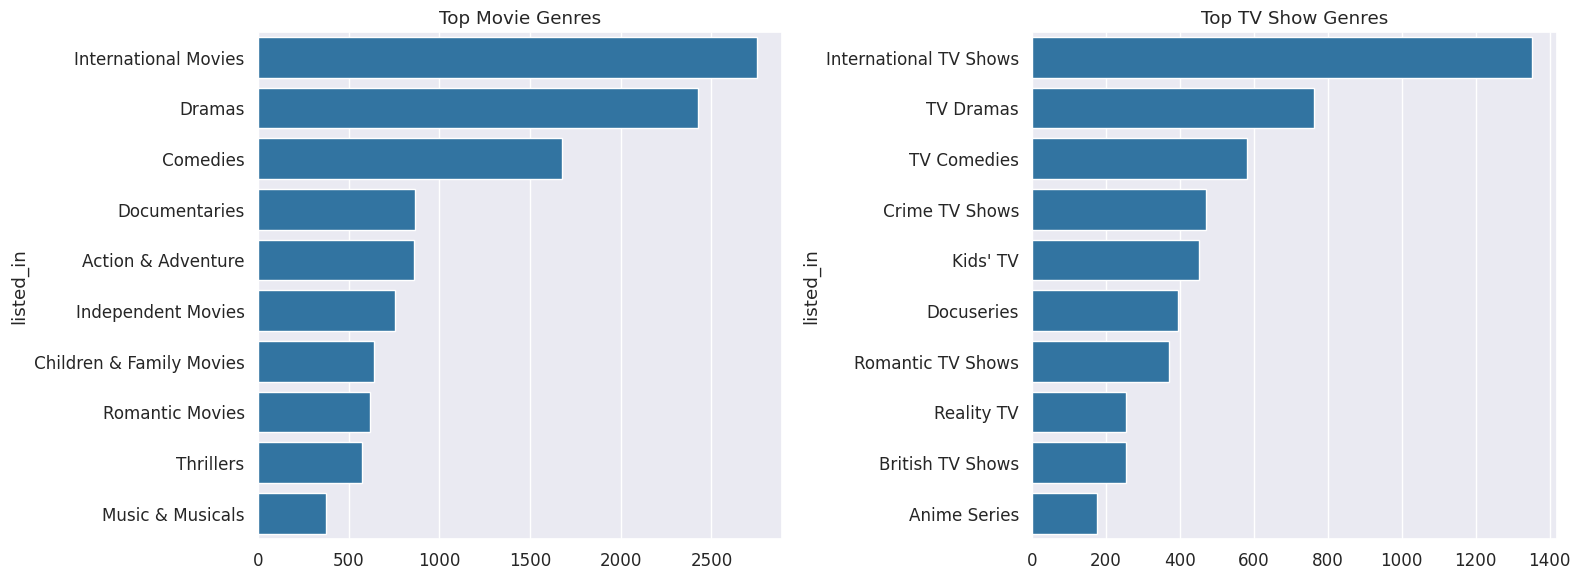

In [ ]:
# Get top genres for each type
top_movie_genres = df[df["type"] == "Movie"]["listed_in"].str.split(", ").explode().value_counts().head(10)
top_tv_genres = df[df["type"] == "TV Show"]["listed_in"].str.split(", ").explode().value_counts().head(10)

# Plot side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(y=top_movie_genres.index, x=top_movie_genres.values, ax=ax1)
ax1.set_title("Top Movie Genres")
sns.barplot(y=top_tv_genres.index, x=top_tv_genres.values, ax=ax2)
ax2.set_title("Top TV Show Genres")
plt.tight_layout()
plt.show()

# *Top 15 Genres by Content Type*

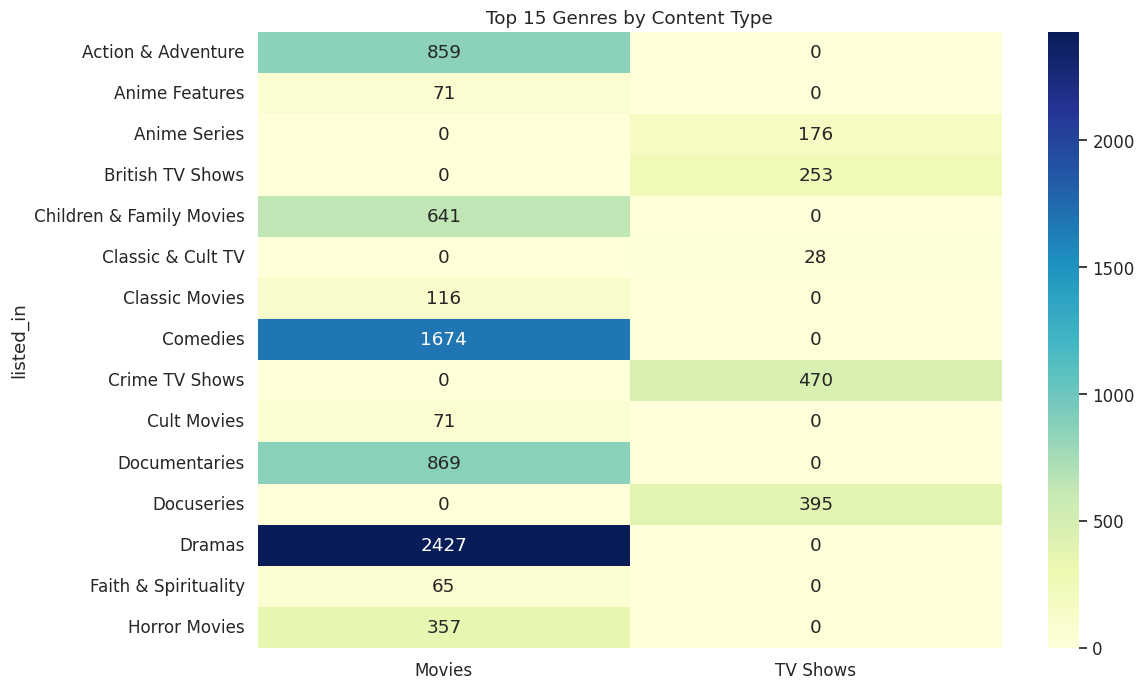

In [ ]:
# Get top genres by type
movies_genres = df[df["type"] == "Movie"]["listed_in"].str.split(", ").explode().value_counts()
tv_genres = df[df["type"] == "TV Show"]["listed_in"].str.split(", ").explode().value_counts()

# Combine into DataFrame
genre_df = pd.DataFrame({"Movies": movies_genres, "TV Shows": tv_genres}).fillna(0)

# Plot top genres
top_n = 15
plt.figure(figsize=(12, 8))
sns.heatmap(genre_df.head(top_n), cmap="YlGnBu", annot=True, fmt="g")
plt.title(f"Top {top_n} Genres by Content Type")
plt.show()

# *Top 10 Main Genres by Content Type*

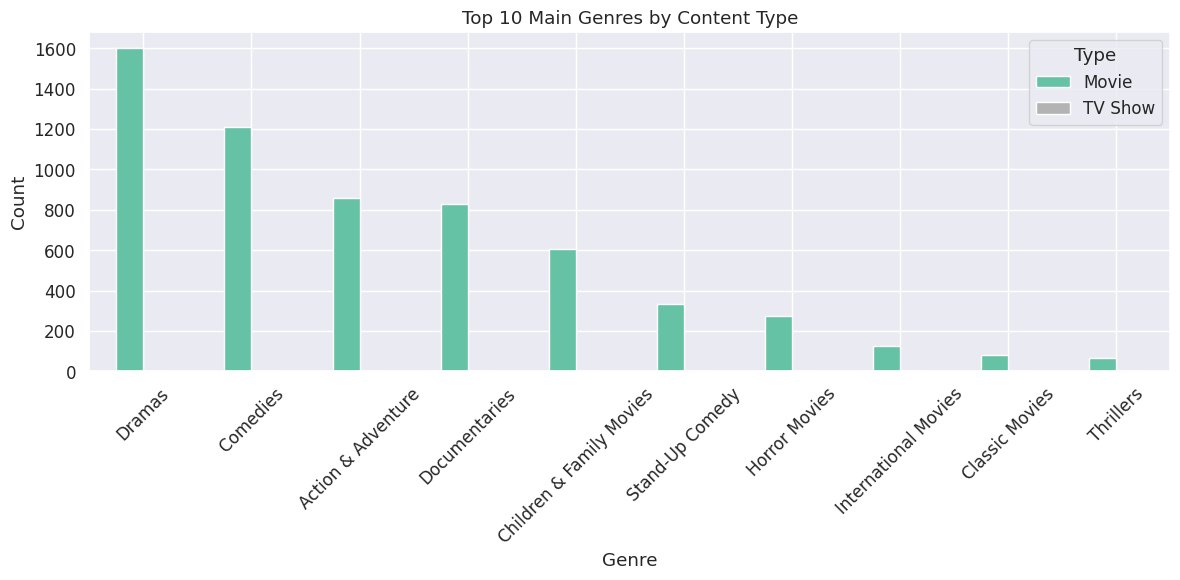

In [ ]:
# Clean and extract first genre
df['main_genre'] = df['listed_in'].str.split(',').str[0]

# Group by genre and type
genre_type_counts = df.groupby(['main_genre', 'type']).size().unstack().fillna(0)

# Plot the grouped bar chart
genre_type_counts = genre_type_counts.sort_values(by='Movie' if 'Movie' in genre_type_counts else 0, ascending=False).head(10)

genre_type_counts.plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title("Top 10 Main Genres by Content Type")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Type")
plt.tight_layout()
plt.show()


# *Netflix Content Added Per Year*

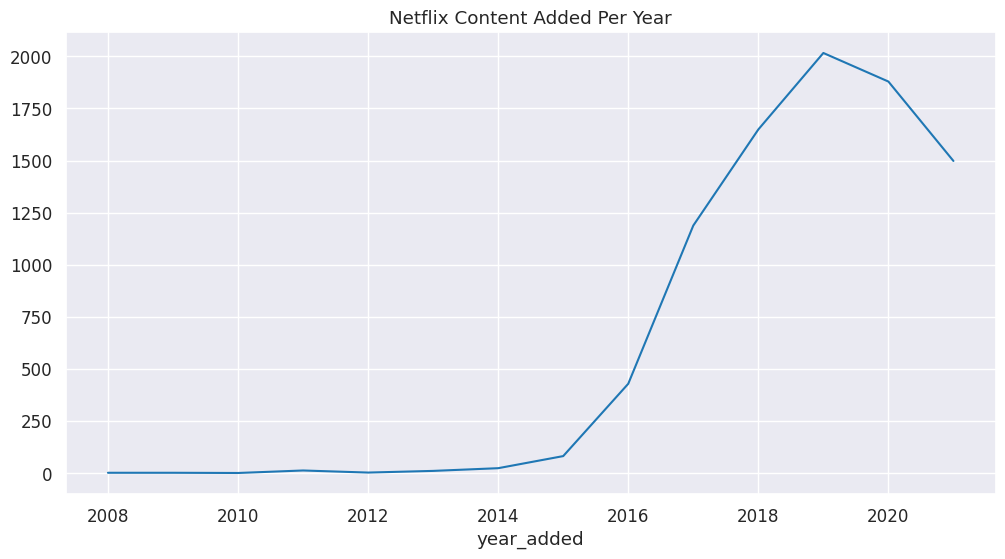

In [ ]:
df["date_added"] = pd.to_datetime(df["date_added"])
df["year_added"] = df["date_added"].dt.year

added_yearly = df["year_added"].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=added_yearly.index, y=added_yearly.values)
plt.title("Netflix Content Added Per Year")
plt.show()

# *Content Release Year vs Netflix Addition Year*

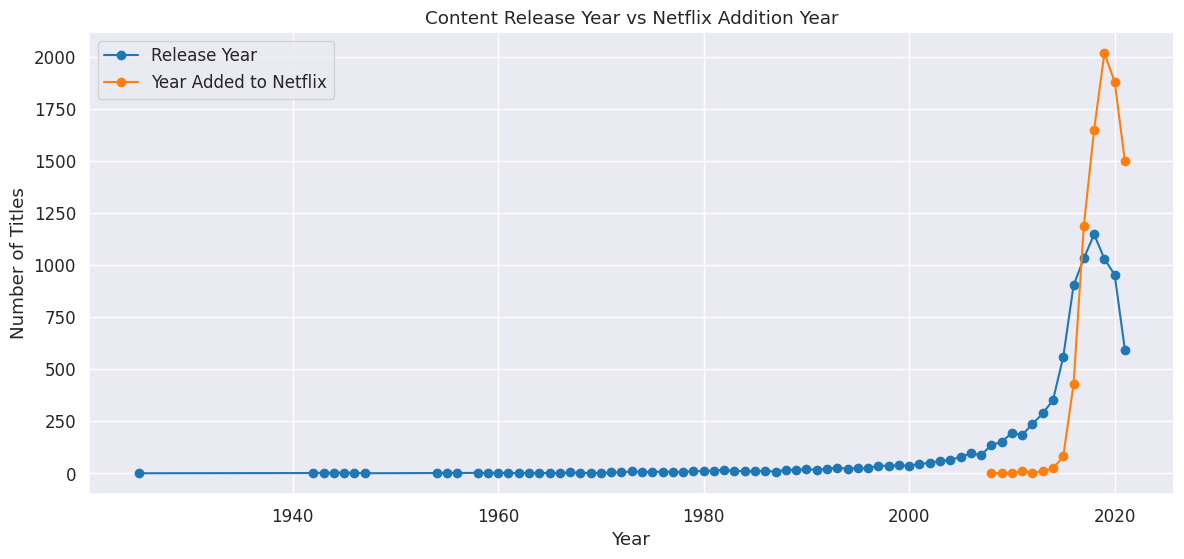

In [ ]:
# Ensure both columns are available
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
df['year_added'] = pd.to_numeric(df['year_added'], errors='coerce')

# Group and count
release_counts = df['release_year'].value_counts().sort_index()
added_counts = df['year_added'].value_counts().sort_index()

# Plot comparison
plt.figure(figsize=(14,6))
plt.plot(release_counts.index, release_counts.values, label='Release Year', marker='o')
plt.plot(added_counts.index, added_counts.values, label='Year Added to Netflix', marker='o')
plt.title("Content Release Year vs Netflix Addition Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.legend()
plt.grid(True)
plt.show()


# *Distribution of Release Years*

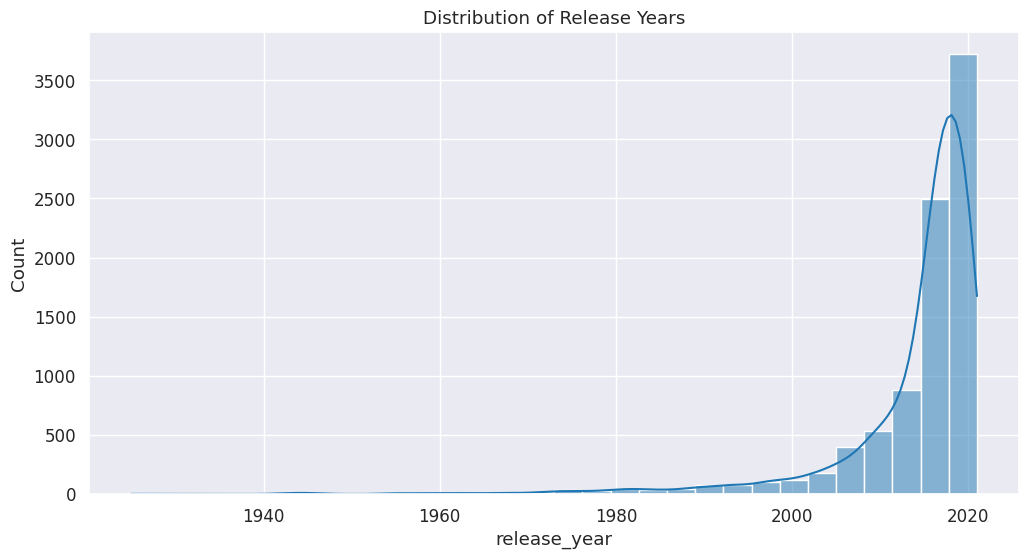

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df["release_year"], bins=30, kde=True)
plt.title("Distribution of Release Years")
plt.show()

# *Content Ratings Distribution*

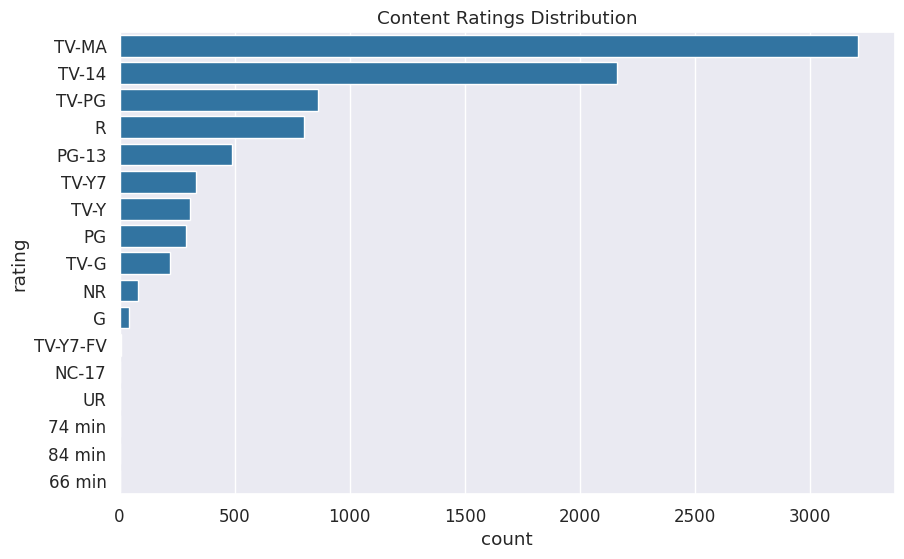

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y="rating", data=df, order=df["rating"].value_counts().index)
plt.title("Content Ratings Distribution")
plt.show()

# *Movie Duration (Minutes) and TV Show Seasons - Outlier Detection*

/tmp/ipython-input-18-1287704092.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_clean["duration"] = movies_clean["duration"].astype(int)


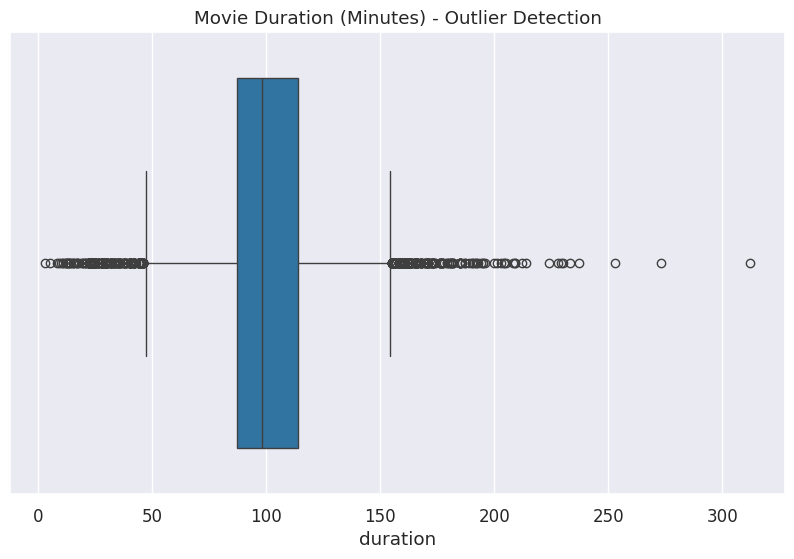

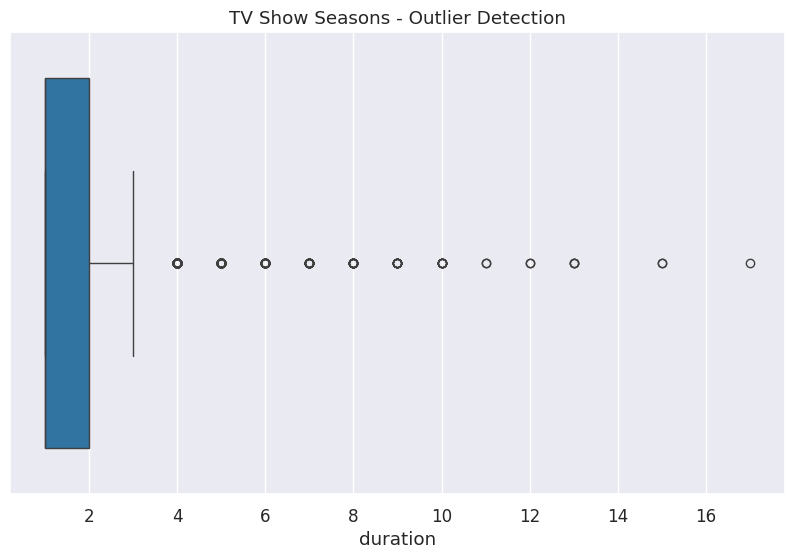

In [ ]:
# Separate Movies and TV Shows
movies = df[df["type"] == "Movie"].copy()  # Use .copy() to avoid SettingWithCopyWarning
tv_shows = df[df["type"] == "TV Show"].copy()

# --- Clean Movie Durations ---
# Step 1: Replace " min" and convert to numeric (float, handles NaN)
movies["duration"] = movies["duration"].str.replace(" min", "").astype(float)

# Step 2: Drop NaN values (optional, or fill with median)
movies_clean = movies.dropna(subset=["duration"])

# Step 3: Convert to integer (now safe since NaN are handled)
movies_clean["duration"] = movies_clean["duration"].astype(int)

# --- Clean TV Show Seasons ---
tv_shows["duration"] = (
    tv_shows["duration"]
    .str.replace(" Seasons?", "", regex=True)  # Handles "Season" or "Seasons"
    .astype(float)  # Convert to float first (handles NaN)
    .dropna()       # Remove missing values
    .astype(int)    # Now safely convert to integer
)

# --- Visualize ---
plt.figure(figsize=(10, 6))
sns.boxplot(x=movies_clean["duration"])
plt.title("Movie Duration (Minutes) - Outlier Detection")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=tv_shows["duration"])
plt.title("TV Show Seasons - Outlier Detection")
plt.show()

# *Outliers in Movie Duration*

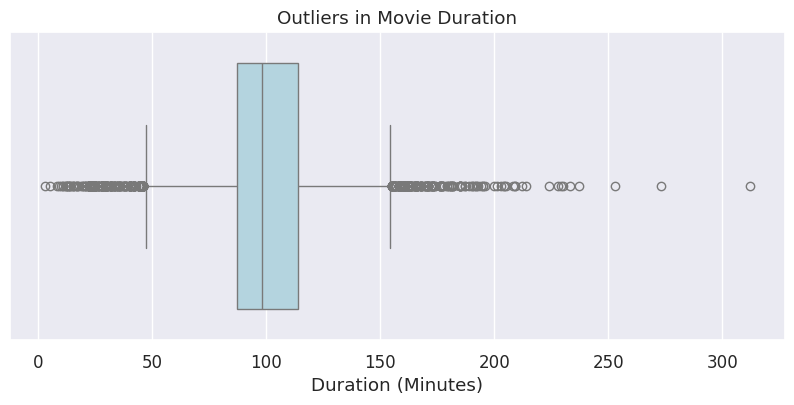

In [ ]:
movies_df = df[df['type'] == 'Movie'].copy()
movies_df['duration_minutes'] = movies_df['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(10,4))
sns.boxplot(data=movies_df, x='duration_minutes', color='lightblue')
plt.title("Outliers in Movie Duration")
plt.xlabel("Duration (Minutes)")
plt.show()


# *Correlation Heatmap*

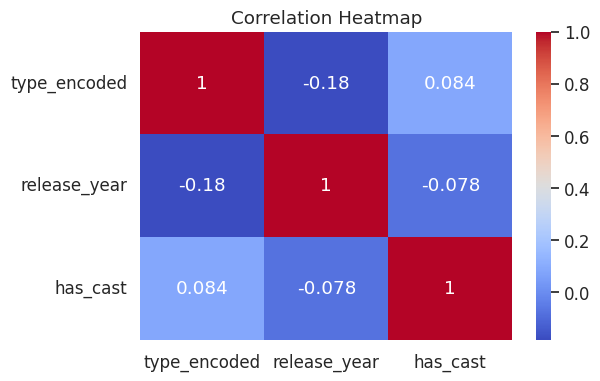

In [ ]:
# Encoding type for correlation
df['type_encoded'] = df['type'].map({'Movie': 1, 'TV Show': 0})
df['has_cast'] = df['cast'].notnull().astype(int)

# Correlation heatmap
corr = df[['type_encoded', 'release_year', 'has_cast']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


# ***📌 EDA Summary: Netflix Movies and TV Shows***
This exploratory data analysis of the Netflix dataset revealed key insights into the platform’s content catalog:

Content Distribution: Movies make up the majority of Netflix's library, significantly outnumbering TV Shows.

Genre Trends: Dramas and Comedies are the most frequent genres overall. TV Shows tend to dominate in genres like Reality TV and Kids' programming, while Movies lead in Documentaries and Thrillers.

Content Growth: A sharp increase in new titles was observed from 2015 to 2020, indicating Netflix's aggressive content expansion during this period.

Country Contributions: The USA, India, and the UK are the top countries producing Netflix content.

Ratings: TV-MA and TV-14 are the most common ratings, suggesting a focus on mature and young-adult audiences.

Outlier Detection: A few movies exceed typical duration limits, and some TV shows span many seasons. These were identified via box plots.

Correlation Analysis: A basic correlation check showed a relationship between content type, year of release, and metadata availability like cast.

Overall, this analysis provides a data-driven understanding of Netflix's content strategy, genre focus, and platform trends. Further analysis could include viewer ratings, user preferences, or sentiment analysis from reviews (if available).